# Preprocesamiento del corpus

In [4]:
import sys,os
main_path = os.path.abspath('..')
if main_path not in sys.path:
    sys.path.append(main_path)
from src.bpe_class import BytePairEncoding

In [ ]:
def preprocess_text(text):
    text = text.lower()
    words = text.split()
    words = [word + "</w>" for word in words]
    return words

def load_and_preprocess_corpus(filepath):
    """Carga el corpus desde un archivo, lo convierte a minúsculas y lo divide en palabras."""
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()
    words = preprocess_text(text)
    return words

In [6]:
corpus_filepath = 'corpus.txt'
print(f"Cargando corpus desde: {corpus_filepath}")
processed_corpus = load_and_preprocess_corpus(corpus_filepath)
processed_corpus

Cargando corpus desde: corpus.txt


['como</w>',
 'se</w>',
 'cuenta</w>',
 'en</w>',
 'el</w>',
 'hobbit,</w>',
 'un</w>',
 'día</w>',
 'llegó</w>',
 'a</w>',
 'la</w>',
 'puerta</w>',
 'de</w>',
 'bilbo</w>',
 'el</w>',
 'gran</w>',
 'mago,</w>',
 'gandalf</w>',
 'el</w>',
 'gris</w>',
 'y</w>',
 'con</w>',
 'él</w>',
 'trece</w>',
 'enanos:</w>',
 'nada</w>',
 'menos</w>',
 'que</w>',
 'thorin</w>',
 'escudode-roble,</w>',
 'descendiente</w>',
 'de</w>',
 'reyes,</w>',
 'y</w>',
 'doce</w>',
 'compañeros</w>',
 'de</w>',
 'exilio.</w>',
 'bilbo</w>',
 'salió</w>',
 'con</w>',
 'ellos,</w>',
 'del</w>',
 'todo</w>',
 'perplejo,</w>',
 'en</w>',
 'una</w>',
 'mañana</w>',
 'de</w>',
 'abril</w>',
 'del</w>',
 'año</w>',
 '1341</w>',
 'de</w>',
 'la</w>',
 'cronología</w>',
 'de</w>',
 'la</w>',
 'comarca,</w>',
 'a</w>',
 'la</w>',
 'búsqueda</w>',
 'del</w>',
 'gran</w>',
 'tesoro:</w>',
 'el</w>',
 'tesoro</w>',
 'oculto</w>',
 'de</w>',
 'los</w>',
 'reyes</w>',
 'enanos</w>',
 'de</w>',
 'la</w>',
 'montaña,</w>',
 

In [ ]:
if processed_corpus:
    print(f"Primeras 10 'palabras' del corpus procesado: {processed_corpus[:10]}")
    print(f"Total de 'palabras' para entrenar BPE: {len(processed_corpus)}")

    # 3. Configurar y Entrenar BPE
    num_merges_bpe = 80
    bpe_tokenizer = BytePairEncoding(num_merges_bpe)

    print(f"\nIniciando entrenamiento BPE con num_merges = {num_merges_bpe}...")
    bpe_tokenizer.train(processed_corpus)
    print("Entrenamiento BPE finalizado.")

    # 4. Obtener y Mostrar el Vocabulario BPE
    vocab_bpe = bpe_tokenizer.get_vocabulary()
    print(f"\n--- Vocabulario BPE final (tamaño {len(vocab_bpe)}) ----")
    vocab_items = list(vocab_bpe.items())
    if len(vocab_items) > 20:
        print("Primeros 10 elementos del vocabulario:", vocab_items[:10])
        print("Últimos 10 elementos del vocabulario:", vocab_items[-10:])
    else:
        print(vocab_bpe)

    print("Merges: ",bpe_tokenizer.merges) # Puede ser una lista larga

    # 5. Probar la Tokenización BPE
    print("\n--- Pruebas de Tokenización BPE ---")
    words_to_test = ["hobbit", "redesneuronales", "orcos", "anillos", "gollums", "elfos"]
    # Añadir algunas palabras del corpus si existe y tiene contenido
    if processed_corpus and len(processed_corpus) > 5:
         words_to_test.extend(processed_corpus[:3]) # Añade las primeras 3 palabras del corpus

    for word in words_to_test:
        tokens = bpe_tokenizer.tokenize(word)
        print(f"Palabra: '{word}' -> Tokens BPE: {tokens}")
else:
    print("No se pudo cargar el corpus. Por favor, revisa el archivo y la ruta.")

Primeras 10 'palabras' del corpus procesado: ['como</w>', 'se</w>', 'cuenta</w>', 'en</w>', 'el</w>', 'hobbit,</w>', 'un</w>', 'día</w>', 'llegó</w>', 'a</w>']
Total de 'palabras' para entrenar BPE: 888

Iniciando entrenamiento BPE con num_merges = 80...
Corpus tokenizado (primeras 20 palabras): [['c', 'o', 'm', 'o', '<', '/', 'w', '>'], ['s', 'e', '<', '/', 'w', '>'], ['c', 'u', 'e', 'n', 't', 'a', '<', '/', 'w', '>'], ['e', 'n', '<', '/', 'w', '>'], ['e', 'l', '<', '/', 'w', '>'], ['h', 'o', 'b', 'b', 'i', 't', ',', '<', '/', 'w', '>'], ['u', 'n', '<', '/', 'w', '>'], ['d', 'í', 'a', '<', '/', 'w', '>'], ['l', 'l', 'e', 'g', 'ó', '<', '/', 'w', '>'], ['a', '<', '/', 'w', '>'], ['l', 'a', '<', '/', 'w', '>'], ['p', 'u', 'e', 'r', 't', 'a', '<', '/', 'w', '>'], ['d', 'e', '<', '/', 'w', '>'], ['b', 'i', 'l', 'b', 'o', '<', '/', 'w', '>'], ['e', 'l', '<', '/', 'w', '>'], ['g', 'r', 'a', 'n', '<', '/', 'w', '>'], ['m', 'a', 'g', 'o', ',', '<', '/', 'w', '>'], ['g', 'a', 'n', 'd', 'a', 'l

# Preparacion de nuestros datos para el modelo LSTM

In [ ]:
import numpy as np
print("\n--- Paso 2: Preparación de Datos para LSTM ---")
full_corpus_text_for_lstm = "corpus.txt"

if full_corpus_text_for_lstm:
    processed_words_for_lstm = load_and_preprocess_corpus(full_corpus_text_for_lstm)
    # 2. Tokenizar el corpus procesado con el BPE entrenado
    all_bpe_tokens = []
    print("Tokenizando el corpus completo con BPE...")
    for word in processed_words_for_lstm:
        tokens_for_word = bpe_tokenizer.tokenize(word)
        all_bpe_tokens.extend(tokens_for_word)

    print(f"Total de tokens BPE en el corpus: {len(all_bpe_tokens)}")
    print(f"Primeros 30 tokens BPE: {all_bpe_tokens[:30]}")

    # 3. Crear Mapeos de Token a ID y de ID a Token
    unique_bpe_tokens = sorted(list(bpe_tokenizer.get_vocabulary().keys()))

    token_to_id = {token: i for i, token in enumerate(unique_bpe_tokens)}
    id_to_token = {i: token for i, token in enumerate(unique_bpe_tokens)}
    vocab_size = len(unique_bpe_tokens)

    print(f"Tamaño del vocabulario para LSTM (unique BPE tokens): {vocab_size}")
    print("Mapeo token_to_id (primeros 10):", list(token_to_id.items())[:10])

    # 4. Convertir todos los tokens BPE a sus IDs correspondientes
    all_token_ids = [token_to_id[token] for token in all_bpe_tokens]
    print(f"Primeros 30 IDs de tokens: {all_token_ids[:30]}")

    # 5. Crear Secuencias de Entrada (X) y Salida (y) para la LSTM
    sequence_length = 30  # Hiperparámetro: Longitud de la secuencia de entrada
    X_data = []
    y_data = []

    for i in range(len(all_token_ids) - sequence_length):
        input_seq = all_token_ids[i : i + sequence_length]
        output_token_id = all_token_ids[i + sequence_length]
        X_data.append(input_seq)
        y_data.append(output_token_id)

    num_sequences = len(X_data)
    print(f"Número total de secuencias generadas para LSTM: {num_sequences}")

    if num_sequences > 0:
        print(f"Ejemplo de X_data[0]: {X_data[0]}")
        print(f"Ejemplo de y_data[0]: {y_data[0]} (token: '{id_to_token[y_data[0]]}')")

        # Convertir a arrays de NumPy
        X = np.array(X_data)
        y = np.array(y_data)

        # ¡Listos para el siguiente paso: Definir y entrenar la LSTM!
        # (En Keras, y no necesitará ser one-hot encoded si usas sparse_categorical_crossentropy)
    else:
        print("No se generaron secuencias. Revisa la longitud del corpus y `sequence_length`.")

else:
    print("No se pudo procesar el corpus para LSTM debido a un error anterior.")


--- Paso 2: Preparación de Datos para LSTM ---
Tokenizando el corpus completo con BPE...
Total de tokens BPE en el corpus: 2725
Primeros 30 tokens BPE: ['co', 'm', 'o</w>', 'se</w>', 'cu', 'ent', 'a</w>', 'en</w>', 'el</w>', 'h', 'o', 'b', 'bi', 't', ',</w>', 'un</w>', 'd', 'ía</w>', 'll', 'e', 'g', 'ó</w>', 'a</w>', 'la</w>', 'pu', 'er', 't', 'a</w>', 'de</w>', 'bilbo</w>']
Tamaño del vocabulario para LSTM (unique BPE tokens): 126
Mapeo token_to_id (primeros 10): [(',', 0), (',</w>', 1), ('-', 2), ('.', 3), ('.</w>', 4), ('/', 5), ('1', 6), ('3', 7), ('4', 8), (':', 9)]
Primeros 30 IDs de tokens: [36, 71, 77, 95, 37, 48, 19, 47, 45, 58, 75, 29, 30, 98, 1, 106, 38, 121, 68, 43, 53, 124, 19, 66, 85, 49, 98, 19, 40, 33]
Número total de secuencias generadas para LSTM: 2695
Ejemplo de X_data[0]: [36, 71, 77, 95, 37, 48, 19, 47, 45, 58, 75, 29, 30, 98, 1, 106, 38, 121, 68, 43, 53, 124, 19, 66, 85, 49, 98, 19, 40, 33]
Ejemplo de y_data[0]: 45 (token: 'el</w>')


# Compilacion y Entrenamiento del modelo LSTM

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout # <--- IMPORTANTE: Incluir Dropout
from tensorflow.keras.callbacks import EarlyStopping # <--- IMPORTANTE: Incluir EarlyStopping
import matplotlib.pyplot as plt
import time

In [11]:
# Hiperparámetros del modelo
embedding_dim = 64
lstm_units = 128
dropout_rate = 0.3
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length),
    Dropout(rate=dropout_rate),
    LSTM(units=lstm_units),
    Dropout(rate=dropout_rate),
    Dense(units=vocab_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

print("\n--- Paso 4 (Reintegrando Regularización): Entrenamiento del Modelo ---")

epochs = 20
batch_size = 128

# Configurar EarlyStopping
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=7,  # Detener después de 7 épocas sin mejora en val_loss
    verbose=1,
    restore_best_weights=True
)

start_time = time.time()

history = model.fit(
    X, y,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    callbacks=[early_stopping_callback]
)

end_time = time.time()
training_time_total = end_time - start_time

print(f"\nEntrenamiento completado en: {training_time_total:.2f} segundos.")
actual_epochs = len(history.history['loss'])
if actual_epochs > 0:
     print(f"Número real de épocas entrenadas: {actual_epochs}")
     print(f"Tiempo promedio por época real: {training_time_total / actual_epochs:.2f} segundos.")

c:\fespa-dev\nlp-curso\miniproyecto-01\env\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


--- Paso 4 (Reintegrando Regularización): Entrenamiento del Modelo ---
Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.0200 - loss: 4.8230 - val_accuracy: 0.0370 - val_loss: 4.5254
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0326 - loss: 4.5794 - val_accuracy: 0.0370 - val_loss: 4.4389
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0319 - loss: 4.4945 - val_accuracy: 0.0370 - val_loss: 4.4197
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0360 - loss: 4.4579 - val_accuracy: 0.0370 - val_loss: 4.4046
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0401 - loss: 4.4540 - val_accuracy: 0.0370 - val_loss: 4.4014
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.0373 - loss: 4.4708 - val_accuracy: 0.0370 - val_loss: 4.4023
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0353 - loss: 4.4606 - val_accuracy: 0.0370 - val_loss: 4.3962
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1


--- Visualización del Entrenamiento ---


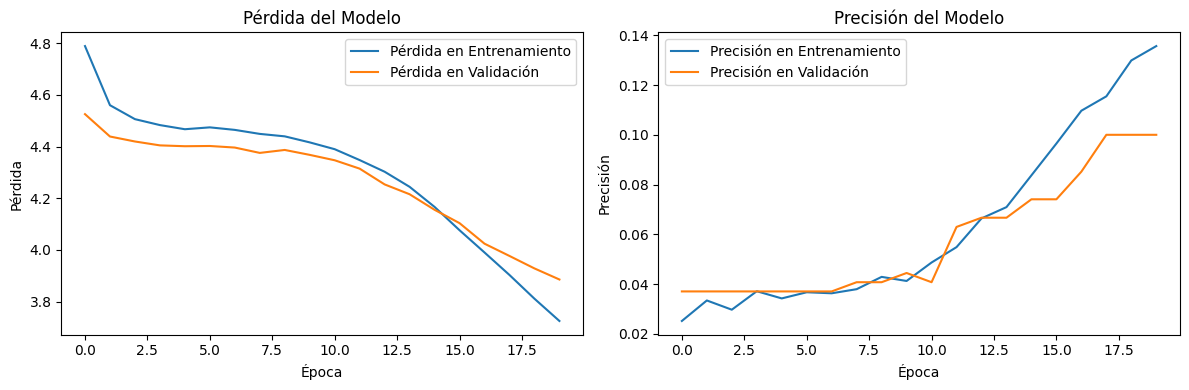

In [12]:
if history.history:
    print("\n--- Visualización del Entrenamiento ---")
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Pérdida en Validación')
    plt.title('Pérdida del Modelo')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
    plt.title('Precisión del Modelo')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generacion de texto

In [13]:
import numpy as np
import tensorflow as tf

In [ ]:
def sample_with_temperature(predictions, temperature=1.0):
    """
    Aplica muestreo con temperatura a las predicciones (logits o probabilidades).
    predictions: array de logits o probabilidades del modelo.
    temperature: float.
    """
    if temperature <= 0: # Greedy, elige el más probable
        return np.argmax(predictions)

    predictions = np.asarray(predictions).astype('float64')

    # 1. Aplicar temperatura a los logits
    preds_temp = predictions / temperature

    # 2. Aplicar Softmax para convertir los logits ajustados en probabilidades
    exp_preds = np.exp(preds_temp - np.max(preds_temp))

    # Calculamos softmax con NumPy:
    probs = exp_preds / np.sum(exp_preds)
    probs = probs / np.sum(probs)

    # Crear una lista de posibles índices [0, 1, 2, ..., vocab_size-1]
    possible_indices = np.arange(len(probs))

    # 3. Muestrear un índice basado en la distribución de probabilidad 'probs'
    sampled_index = np.random.choice(possible_indices, p=probs)

    return sampled_index

In [ ]:
def generate_text(model, bpe_tokenizer, token_to_id, id_to_token, sequence_length,
                  seed_text, num_tokens_to_generate, temperature=1.0):
    """
    Genera texto usando el modelo LSTM entrenado y tokenización BPE.
    """
    print(f"Generando texto con semilla: '{seed_text}' y temperatura: {temperature}")

    generated_tokens = []

    current_bpe_tokens = []
    seed_words = preprocess_text(seed_text)
    for word in seed_words:
        tokens_for_word = bpe_tokenizer.tokenize(word)
        current_bpe_tokens.extend(tokens_for_word)

    # Convertir tokens BPE de la semilla a IDs
    input_ids = [token_to_id.get(token, 0) for token in current_bpe_tokens] # Usar 0 para OOV (aunque BPE debería evitarlo)

    print(f"Semilla tokenizada (BPE): {current_bpe_tokens}")
    print(f"Semilla tokenizada (IDs): {input_ids}")

    # 2. Bucle de generación
    for _ in range(num_tokens_to_generate):
        # padding
        padded_input_sequence = tf.keras.preprocessing.sequence.pad_sequences([input_ids], maxlen=sequence_length, value=0)

        # Obtener predicciones del modelo (probabilidades)
        predictions = model.predict(padded_input_sequence, verbose=0)[0] # Tomamos el primer batch

        # Muestrear el ID del siguiente token usando temperatura
        next_token_id = sample_with_temperature(predictions, temperature)

        # Convertir ID a token BPE
        next_token_str = id_to_token.get(next_token_id, "<unk>")

        # Añadir el nuevo token a la lista de generados y a la secuencia de entrada para la siguiente iteración
        generated_tokens.append(next_token_str)
        input_ids.append(next_token_id)

    # 3. Postprocesar el texto generado
    output_text = "".join(generated_tokens)
    output_text = output_text.replace("</w>", " ").strip()
    return seed_text + output_text

In [16]:
# Semilla para empezar a generar
#seed_phrase = "gandalf y los" # Prueba con diferentes semillas
#seed_phrase = "el anillo"
seed_phrase = "en un agujero en el suelo vivia un " # Semilla más larga

tokens_a_generar = 30

print("\n== Generación de Texto ==")

# probamos con diferentes temperaturas
for temp in [0, 0.5, 0.8, 1.0, 1.2]:
    generated_output = generate_text(
        model,
        bpe_tokenizer,
        token_to_id,
        id_to_token,
        sequence_length,
        seed_phrase,
        tokens_a_generar,
        temperature=temp
    )
    print(f"\nTemperatura: {temp}")
    print("Texto Generado:")
    print(generated_output)
    print("=" * 64)


== Generación de Texto ==
Generando texto con semilla: 'en un agujero en el suelo vivia un ' y temperatura: 0
Semilla tokenizada (BPE): ['en</w>', 'un</w>', 'a', 'gu', 'j', 'er', 'o</w>', 'en</w>', 'el</w>', 'su', 'e', 'lo</w>', 'vi', 'vi', 'a</w>', 'un</w>']
Semilla tokenizada (IDs): [47, 106, 17, 57, 63, 49, 77, 47, 45, 97, 43, 69, 109, 109, 19, 106]

Temperatura: 0
Texto Generado:
en un agujero en el suelo vivia un oro de la monnnla y lue que la merer amo de la mini
Generando texto con semilla: 'en un agujero en el suelo vivia un ' y temperatura: 0.5
Semilla tokenizada (BPE): ['en</w>', 'un</w>', 'a', 'gu', 'j', 'er', 'o</w>', 'en</w>', 'el</w>', 'su', 'e', 'lo</w>', 'vi', 'vi', 'a</w>', 'un</w>']
Semilla tokenizada (IDs): [47, 106, 17, 57, 63, 49, 77, 47, 45, 97, 43, 69, 109, 109, 19, 106]

Temperatura: 0.5
Texto Generado:
en un agujero en el suelo vivia un perbixbilbo l bilse oa, co:coll>1se ad<sisus xos . »coa, entcino
Generando texto con semilla: 'en un agujero en el suelo vivi